In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("/kaggle/input/testdata/Reviews.csv")

/kaggle/input/testdata/Reviews.csv


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

# Step 1: Data Preparation

# Load dataset and take the first 10,000 rows
df = df.head(10000)[['Text', 'Score']]

# Convert 'Score' values to binary (positive/negative)
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Split text into words
df['Text'] = df['Text'].astype(str).str.split()

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Join words back for TF-IDF vectorization
df['Text'] = df['Text'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Text']).toarray()
y = df['Score'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Modeling with CNN and LSTM

# CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.7))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN Model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

cnn_history

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.7610 - loss: 0.7586 - val_accuracy: 0.7600 - val_loss: 0.6703
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.7580 - loss: 0.6650 - val_accuracy: 0.7600 - val_loss: 0.6495
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.7706 - loss: 0.6425 - val_accuracy: 0.7600 - val_loss: 0.6317
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.7723 - loss: 0.6242 - val_accuracy: 0.7600 - val_loss: 0.6167
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.7678 - loss: 0.6105 - val_accuracy: 0.7600 - val_loss: 0.6041
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.7657 - loss: 0.5988 - val_accuracy: 0.7600 - val_loss: 0.5936
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.7555 - loss: 0.5936 - val_accuracy:

In [3]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0.7))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM Model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

lstm_history

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 922s 9s/step - accuracy: 0.7591 - loss: 0.5680 - val_accuracy: 0.7600 - val_loss: 0.5519
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 924s 9s/step - accuracy: 0.7584 - loss: 0.5606 - val_accuracy: 0.7600 - val_loss: 0.5520
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 963s 9s/step - accuracy: 0.7623 - loss: 0.5546 - val_accuracy: 0.7600 - val_loss: 0.5520
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 929s 9s/step - accuracy: 0.7626 - loss: 0.5550 - val_accuracy: 0.7600 - val_loss: 0.5556
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 923s 9s/step - accuracy: 0.7659 - loss: 0.5525 - val_accuracy: 0.7600 - val_loss: 0.5512
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 926s 9s/step - accuracy: 0.7579 - loss: 0.5606 - val_accuracy: 0.7600 - val_loss: 0.5511
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 938s 9s/step - accuracy: 0.7682 - loss: 0.5468 - val_accuracy: 0.7600 - val_loss: 0.5528
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 984s 9s/step - accuracy: 0.7632 - loss: 0.5499 - val_accu

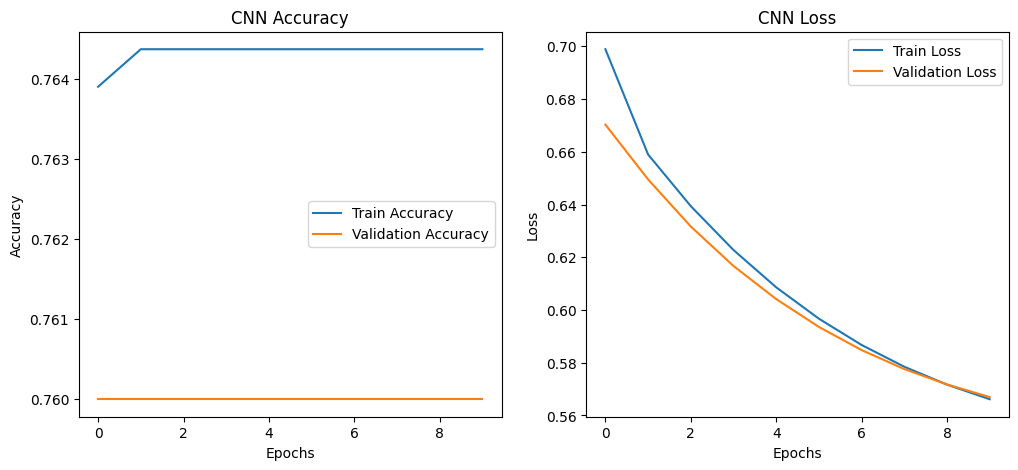

In [4]:

# Step 3: Plot Accuracy and Loss

# Plot CNN Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



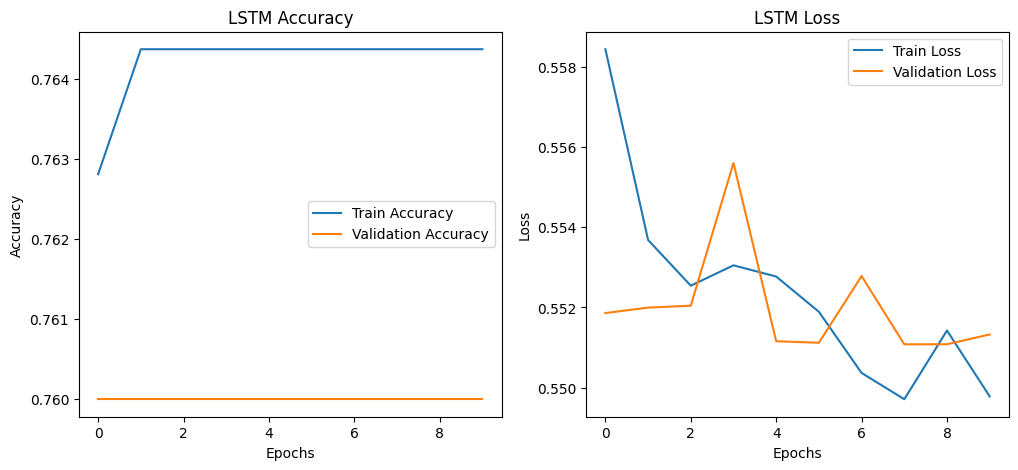

In [5]:

# Plot LSTM Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [6]:
# Step 3: Model Evaluation with Test Data
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test)
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test)

#print(f"CNN Test Accuracy: {cnn_test_accuracy:.2f}")
#print(f"LSTM Test Accuracy: {lstm_test_accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.7626 - loss: 0.5650
63/63 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.7626 - loss: 0.5482
